# Minibatch
#### ในบทที่ผ่านๆมาเราใช้ข้อมูลที่มีในการฝึกโครงข่ายประสาทเทียมทีเดียวพร้อมกันทั้งหมด
#### แต่ในทางปฏิบัติแล้วเรานิยมแบ่งข้อมูลเป็นกลุ่มเล็กๆแล้วคำนวณทีละกลุ่ม วิธีการนี้เรียกว่ามินิแบตช์ (minibatch)
การใช้มินิแบตช์ในการเคลื่อนลงตามความชันก็ถือว่าเป็น***การเคลื่อนลงตามความชันแบบสุ่ม (stochastic gradient descent)*** เช่นเดียวกับการใช้ข้อมูลแค่ทีละตัว

### นอกจากนี้ยังมีข้อดีอีกอย่าง นั่นคือลดโอกาสที่จะได้คำตอบที่เป็นแค่ค่าต่ำสุดสัมพัทธ์ ค่าต่ำสุดสัมพัทธ์คือค่าที่ดูแล้วต่ำที่สุดเมื่อเทียบกับบริเวณรอบๆ แต่จริงๆแล้วอาจยังมีจุดที่ต่ำกว่านั้นอยู่ไกลออกไป

In [6]:
import sys
sys.path.insert(1, '../../Side Stories/')
from unagi import Affin, Sigmoid, Sigmoid_entropy, Adam, Relu

In [56]:
class NN:
    def __init__(self,m ,eta=0.001, active_func='relu'):
        m.append(1)
        self.m = m
        self.layers = []
        for i in range(len(m) - 1):
            self.layers.append(Affin(m[i], m[i+1], np.sqrt(2./m[i])))
            if (i<len(m)-2):
                if active_func == 'relu':
                    self.layers.append(Relu())
                else:
                    self.layers.append(Sigmoid())
        self.layers.append(Sigmoid_entropy())
        self.opt = Adam(self.param(), eta=eta)
    
    def learn(self,X,z, n_learn, n_batch=50):
        n = len(z)
        self.entropy = []
        self.score = []
        
        for o in range(n_learn):
            select = np.random.permutation(n)
            for i in range(0, n, n_batch):
                Xb = X[select[i: i+n_batch]]
                zb = X[select[i: i+n_batch]]
                entropy = self.cal_entropy(Xb, zb)
                entropy.phraeyon()
                self.opt()
            entropy, score = self.cal_entropy(Xb, zb, ao_score=1)
            self.entropy.append(entropy.kha)
            self.score.append(score)
    
    def cal_entropy(self, X, z, ao_score=0):
        for layer in self.layers[:-1]:
            X = layer(X)
            if ao_score : # if == 1
                return self.layers[-1](X, z), ((X.kha >= 0).flatten()==z).mean()
            return self.layers[-1](X, z)
        
    
    def param(self):
        p = []
        for layer in self.layers:
            if(hasattr(layer,'param')):
                p.extend(layer.param)
        return p
    
    def predict(self,X):
        for layer in self.layers[:-1]:
            X = layer(X)
        return (X.kha>=0).flatten().astype(int)



# ลองนำมาใช้จำแนกข้อมูลหน้าตาซับซ้อนแบบนี้


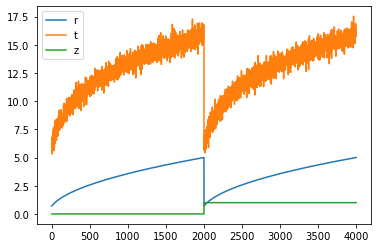

In [57]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(7)
r = np.tile(np.sqrt(np.linspace(.5, 25, 2000)), 2)
t = np.random.normal(np.sqrt(r*50), 0.5)
z = np.arange(2).repeat(2000)
# z = np.tile(np.linspace(0, 10,), 50)

for k in [r,t,z]:
    plt.plot(k)
plt.legend(['r', 't', 'z'])
plt.show()

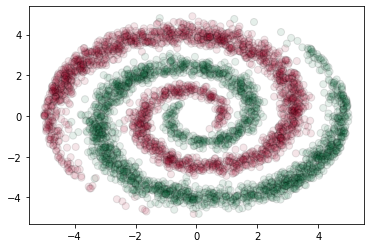

In [58]:
np.random.seed(7)
r = np.tile(np.sqrt(np.linspace(.5, 25, 2000)), 2)
t = np.random.normal(np.sqrt(r*50), 0.5)
z = np.arange(2).repeat(2000)

t += z*np.pi
X = np.array([r*np.cos(t), r*np.sin(t)]).T

plt.scatter(X[:,0], X[:,1], 50, c=z, alpha=.1, edgecolor='k', cmap='RdYlGn')
plt.show()

In [59]:
nn = NN(m=[2,70], eta=.005)
nn.learn(X, z, n_learn=100, n_batch=50)

plt.subplot(211, xticks=[])
plt.plot(nn.entropy, '#772277')
plt.title('entropy', size=12)

plt.subplot(212, xticks=[])
plt.plot(nn.score, '#227777')
plt.title('score', size=12)

plt.figure()
mx, my = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 200),
                    np.linspace(X[:,1].min(), X[:,1].max(), 200))
mX = np.array([mx.ravel(), my.ravel()]).T
mz = nn.predict(mX).reshape(200, -1)

plt.axes(aspect=1, 
        xlim=(X[:,0].min(), X[:,0].max()),
        ylim=(X[:,1].min(), X[:,1].max()))
plt.contourf(mx, my, mz, cmap='RdYlGn', alpha=.5)
plt.scatter(X[:,0], X[:,1], 20, c=z, alpha=.5, 
           edgecolor='k', cmap='RdYlGn')
plt.show()


ValueError: operands could not be broadcast together with shapes (50,1,2) (50,70) 

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from unagi import Affin,Sigmoid,Sigmoid_entropy,Adam,Relu

class Prasat:
    def __init__(self,m,eta,kratun='relu'):
        m.append(1)
        self.m = m
        self.chan = []
        for i in range(len(m)-1):
            self.chan.append(Affin(m[i],m[i+1],np.sqrt(2./m[i])))
            if(i<len(m)-2):
                if(kratun=='relu'):
                    self.chan.append(Relu())
                else:
                    self.chan.append(Sigmoid())
        self.chan.append(Sigmoid_entropy())
        self.opt = Adam(self.param(),eta=eta)
    
    def rianru(self,X,z,n_thamsam,n_batch=50):
        n = len(z)
        self.entropy = []
        self.khanaen = []
        for o in range(n_thamsam):
            lueak = np.random.permutation(n)
            for i in range(0,n,n_batch):
                Xb = X[lueak[i:i+n_batch]]
                zb = z[lueak[i:i+n_batch]]
                entropy = self.ha_entropy(Xb,zb)
                entropy.phraeyon()
                self.opt()
            entropy,khanaen = self.ha_entropy(Xb,zb,ao_khanaen=1)
            self.entropy.append(entropy.kha)
            self.khanaen.append(khanaen)
    
    def ha_entropy(self,X,z,ao_khanaen=0):
        for c in self.chan[:-1]:
            X = c(X)
        if(ao_khanaen):
            return self.chan[-1](X,z),((X.kha>=0).flatten()==z).mean()
        return self.chan[-1](X,z)
    
    def param(self):
        p = []
        for c in self.chan:
            if(hasattr(c,'param')):
                p.extend(c.param)
        return p
    
    def thamnai(self,X):
        for c in self.chan[:-1]:
            X = c(X)
        return (X.kha>=0).flatten().astype(int)

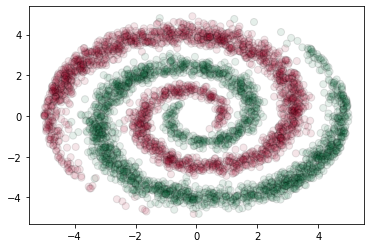

In [61]:
np.random.seed(7)
r = np.tile(np.sqrt(np.linspace(0.5,25,2000)),2)
t = np.random.normal(np.sqrt(r*50),0.5)
z = np.arange(2).repeat(2000)
t += z*np.pi
X = np.array([r*np.cos(t),r*np.sin(t)]).T

plt.scatter(X[:,0],X[:,1],50,c=z,alpha=0.1,edgecolor='k',cmap='RdYlGn')
plt.show()


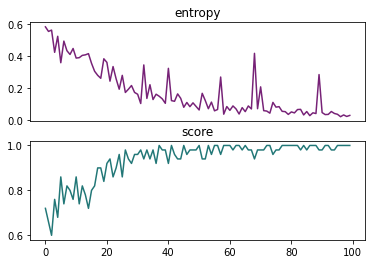

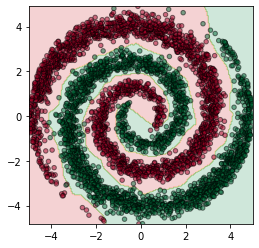

In [63]:
prasat = Prasat(m=[2,70],eta=0.005)
prasat.rianru(X,z,n_thamsam=100,n_batch=50)
plt.subplot(211,xticks=[])
plt.plot(prasat.entropy,'#772277')
plt.title('entropy')
plt.subplot(212)
plt.plot(prasat.khanaen,'#227777')
plt.title('score')
plt.figure()

mx,my = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),200),np.linspace(X[:,1].min(),X[:,1].max(),200))
mX = np.array([mx.ravel(),my.ravel()]).T
mz = prasat.thamnai(mX).reshape(200,-1)
plt.axes(aspect=1,xlim=(X[:,0].min(),X[:,0].max()),ylim=(X[:,1].min(),X[:,1].max()))
plt.contourf(mx,my,mz,cmap='RdYlGn',alpha=0.2)
plt.scatter(X[:,0],X[:,1],20,c=z,alpha=0.5,edgecolor='k',cmap='RdYlGn')
plt.show()